# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [48]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[-0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[-0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [49]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | nogliki
Processing Record 3 of Set 1 | lensk
Processing Record 4 of Set 1 | zaghouan
Processing Record 5 of Set 1 | weno
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | ende
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | khorixas
Processing Record 11 of Set 1 | takamaka
City not found. Skipping...
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | valparaiso
Processing Record 14 of Set 1 | arkalyk
Processing Record 15 of Set 1 | olgii
City not found. Skipping...
Processing Record 16 of Set 1 | bulanash
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | mountain home
Processing Record 19 of Set 1 | ascension
Processing Record 20 of Set 1 | moyale
Processing Record 21 of Set 1 | mocorito
Processing Record 22 of Set

In [50]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [51]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,43.41,100,75,5.01,CA,2023-10-04 10:37:56
1,nogliki,51.8333,143.1667,51.35,64,92,3.00,RU,2023-10-04 10:37:56
2,lensk,60.7253,114.9278,36.72,94,100,8.99,RU,2023-10-04 10:37:57
3,zaghouan,36.4029,10.1429,82.26,30,0,1.19,TN,2023-10-04 10:37:57
4,weno,7.4515,151.8468,82.35,74,40,0.00,FM,2023-10-04 10:37:57


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,43.41,100,75,5.01,CA,2023-10-04 10:37:56
1,nogliki,51.8333,143.1667,51.35,64,92,3.00,RU,2023-10-04 10:37:56
2,lensk,60.7253,114.9278,36.72,94,100,8.99,RU,2023-10-04 10:37:57
3,zaghouan,36.4029,10.1429,82.26,30,0,1.19,TN,2023-10-04 10:37:57
4,weno,7.4515,151.8468,82.35,74,40,0.00,FM,2023-10-04 10:37:57


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

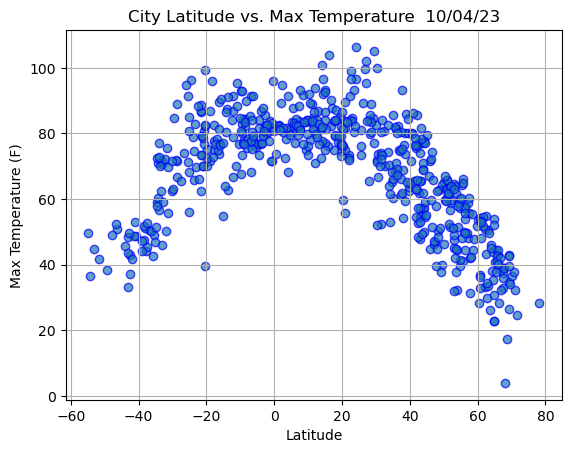

In [65]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="b", alpha=0.7)


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature "+ (" ") + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

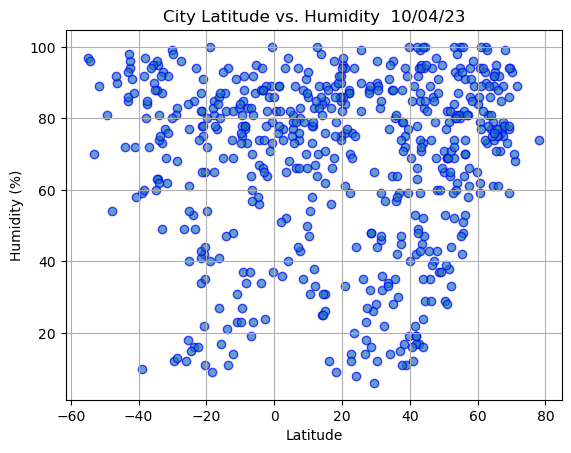

In [66]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="b", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity "+ (" ") + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

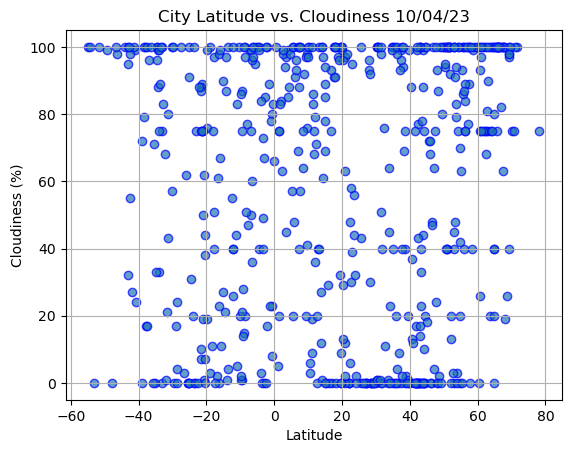

In [67]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="b", alpha=0.7)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness" + (" ") + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

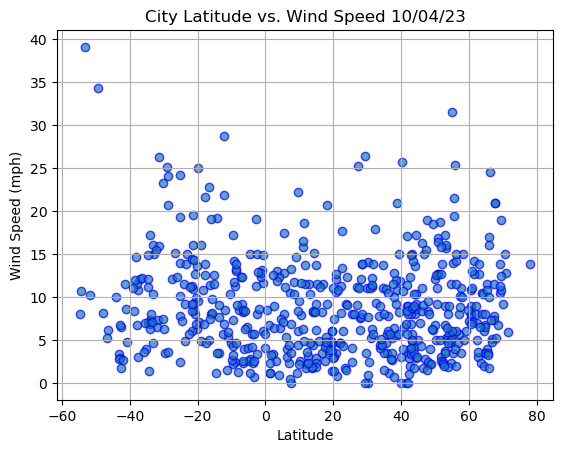

In [69]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="b", alpha=0.7)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed" + (" ") + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create a scatter plot
    plt.scatter(x_values, y_values)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r")

    # Annotate the plot with the linear equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")

    # Label the plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Show the plot
    plt.show()


In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,43.41,100,75,5.01,CA,2023-10-04 10:37:56
1,nogliki,51.8333,143.1667,51.35,64,92,3.00,RU,2023-10-04 10:37:56
2,lensk,60.7253,114.9278,36.72,94,100,8.99,RU,2023-10-04 10:37:57
3,zaghouan,36.4029,10.1429,82.26,30,0,1.19,TN,2023-10-04 10:37:57
4,weno,7.4515,151.8468,82.35,74,40,0.00,FM,2023-10-04 10:37:57


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,margaret river,-33.9500,115.0667,56.61,81,33,7.36,AU,2023-10-04 10:37:57
7,ende,-8.8432,121.6623,78.15,88,15,2.46,ID,2023-10-04 10:37:58
8,ushuaia,-54.8000,-68.3000,49.66,97,100,8.01,AR,2023-10-04 10:37:58
9,khorixas,-20.3667,14.9667,99.32,11,44,9.89,NaN,2023-10-04 10:37:58
10,adamstown,-25.0660,-130.1015,68.23,77,100,19.30,PN,2023-10-04 10:37:58


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6785755864612839


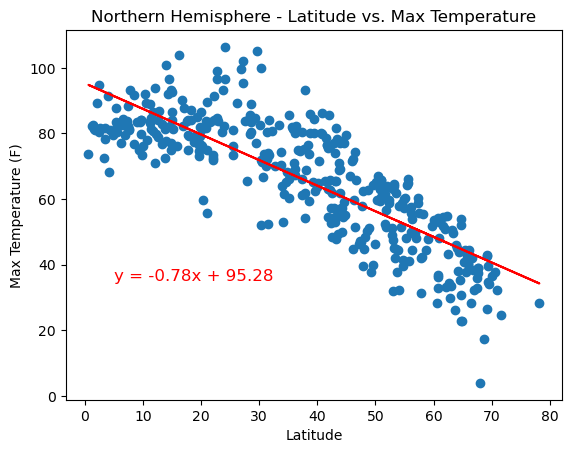

In [85]:
# Linear regression on Northern Hemisphere
# Define the x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")

# Annotate the plot with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (5, 35), fontsize=12, color="red")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Latitude vs. Max Temperature")

print(f"The r-value is: {r_value**2}")

# Show the plot
plt.show()

The r-value is: 0.5615561910167288


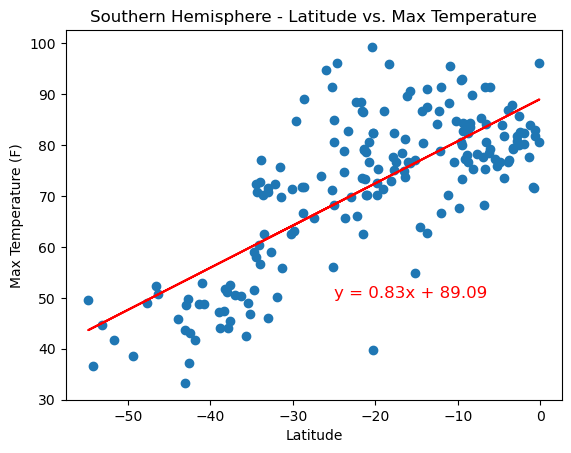

In [86]:
# Linear regression on Southern Hemisphere
# Define the x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")

# Annotate the plot with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-25, 50), fontsize=12, color="red")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Latitude vs. Max Temperature")

print(f"The r-value is: {r_value**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** In summary, these linear regression analyses provide insights into how latitude correlates with maximum temperature in the Northern and Southern Hemispheres. They confirm the general belief that temperature appears to be higher near the equator and lower as you move away from it.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.015165694800499426


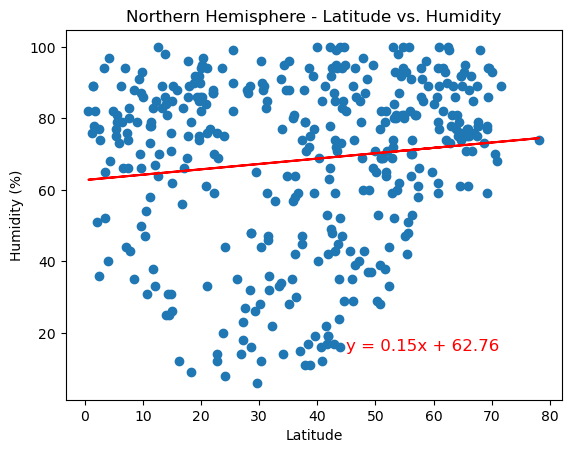

In [87]:
# Northern Hemisphere

# Define the x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")

# Annotate the plot with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (45, 15), fontsize=12, color="red")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Latitude vs. Humidity")

print(f"The r-value is: {r_value**2}")

# Show the plot
plt.show()


The r-value is: 0.02793962623718031


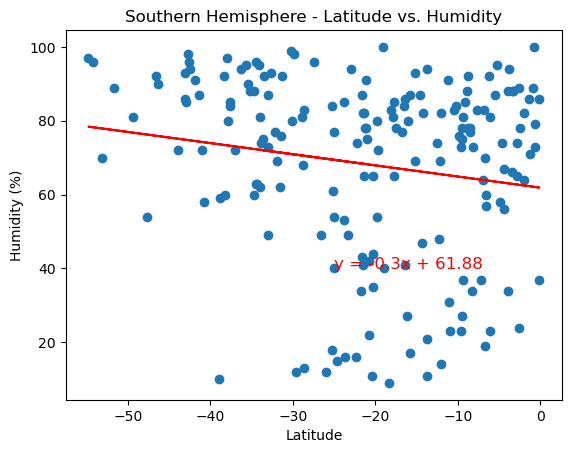

In [88]:
# Southern Hemisphere
# Define the x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")

# Annotate the plot with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-25, 40), fontsize=12, color="red")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Latitude vs. Humidity")

print(f"The r-value is: {r_value**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** The relatively weak correlations in both hemispheres indicate that latitude alone does not explain all the variations in temperature and humidity. I think it's an example of why we need to consider multiple factors when measuring data (in this case the weather).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.012983546894421332


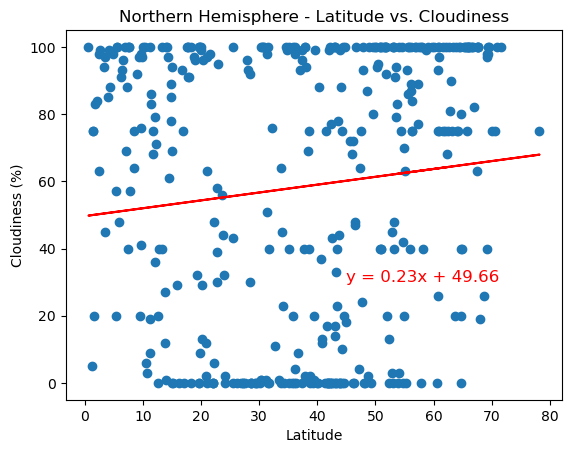

In [89]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")

# Annotate the plot with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (45, 30), fontsize=12, color="red")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")

print(f"The r-value is: {r_value**2}")

# Show the plot
plt.show()

The r-value is: 0.008357141337044818


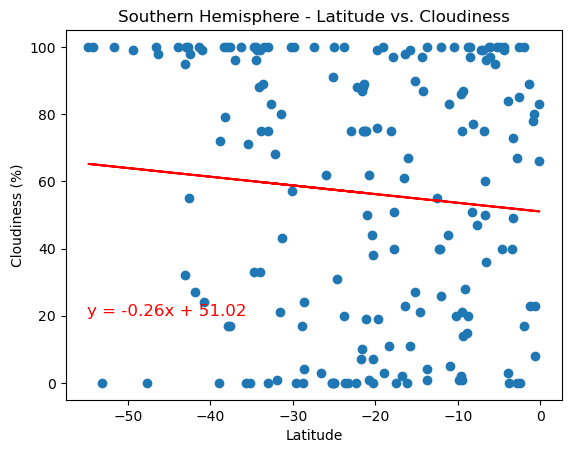

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")

# Annotate the plot with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-55, 20), fontsize=12, color="red")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")

print(f"The r-value is: {r_value**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:**Unlike temperature or humidity, which showed more pronounced linear relationships, cloudiness appears to be less directly linked to latitude and is assumingly more effected by wind speed.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.022343512403273265


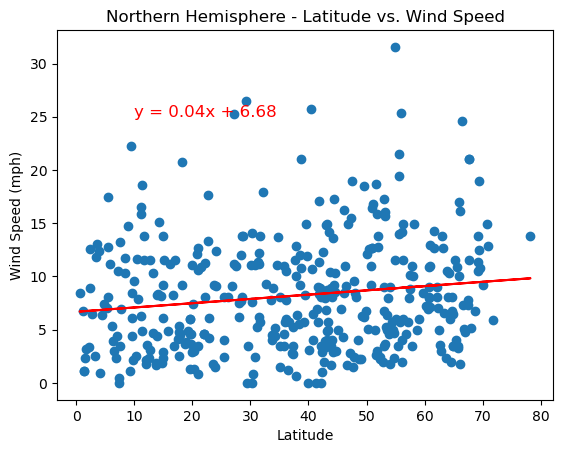

In [84]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")

# Annotate the plot with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (10, 25), fontsize=12, color="red")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Latitude vs. Wind Speed")

# Show the plot
print(f"The r-value is: {r_value**2}")
plt.show()

The r-value is: 0.022139356511466562


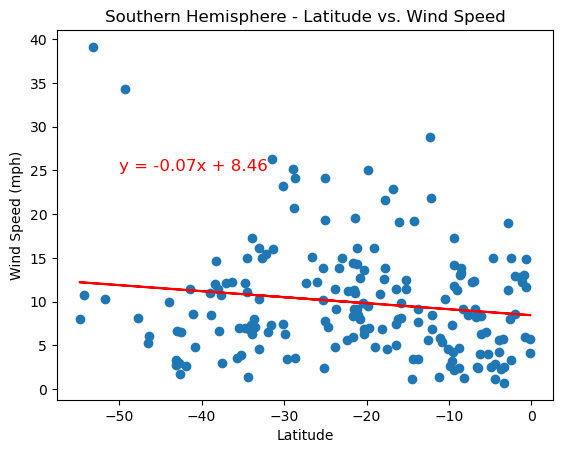

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")

# Annotate the plot with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-50, 25), fontsize=12, color="red")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
print(f"The r-value is: {r_value**2}")

# Show the plot
plt.show()


**Discussion about the linear relationship:**The (r-value) is close to zero for both Northern/Southern hemispheres, reinforcing the notion that wind speed is influenced by numerous factors beyond latitude.